In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [14]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 8.9 KB
None


In [5]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


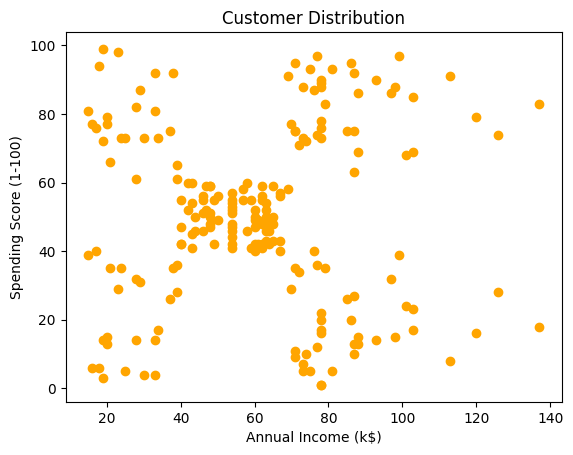

In [6]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color="orange")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()


In [19]:
x=df[['Annual Income (k$)' , 'Spending Score (1-100)']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


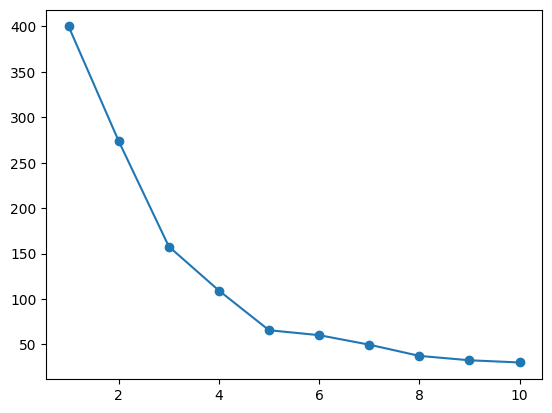

In [9]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(x_scaled)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.show()



In [23]:
kmeans = KMeans(n_clusters=5,random_state=42)
df['Cluster']=kmeans.fit_predict(x_scaled)
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


WCSS values: [400.0, 269.6910121927639, 157.70400815035947, 108.92131661364357, 65.56840815571681, 55.057348270386, 44.86475569922556, 37.228187677585886, 32.39226763033116, 29.981897788243693]


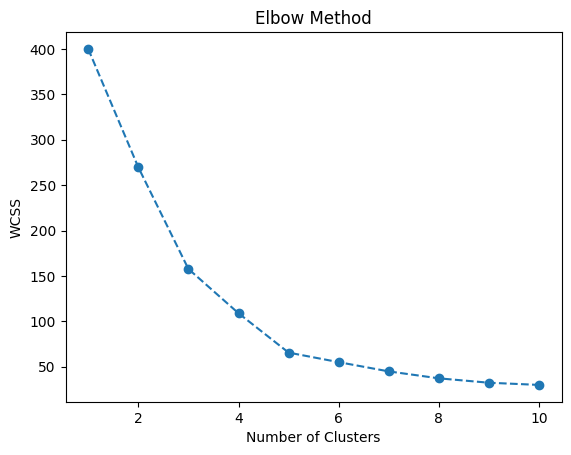

In [21]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

print("WCSS values:",wcss)

plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

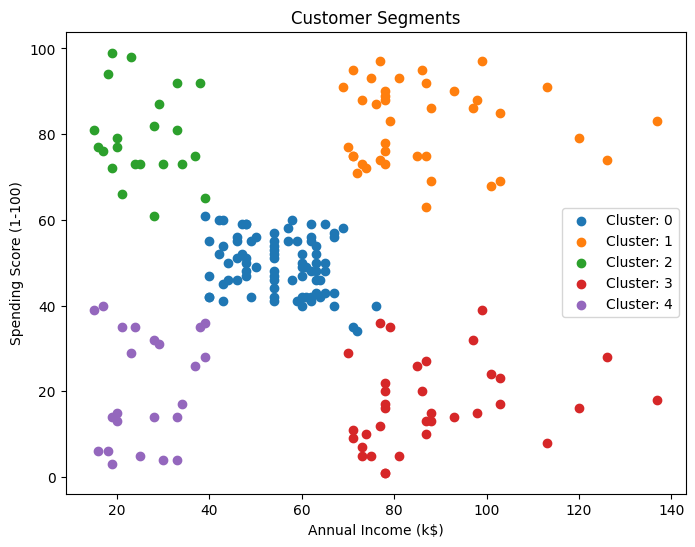

In [12]:
plt.figure(figsize=(8,6))
for i in range(5):
    plt.scatter(df[df['Cluster']==i]['Annual Income (k$)'],
                df[df['Cluster']==i]['Spending Score (1-100)'],
                label=f'Cluster: {i}'
                )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [25]:
import joblib
joblib.dump(scaler,"scaler.pkl")
joblib.dump(kmeans,"means_model.pkl")
print("✅ Models saved successfully!")

✅ Models saved successfully!


In [24]:
# Test predictions with actual data samples
print("=" * 60)
print("TESTING MODEL PREDICTIONS")
print("=" * 60)

# Get some sample data from different clusters
for cluster_id in range(5):
    sample_data = df[df['Cluster'] == cluster_id].iloc[0]
    income = sample_data['Annual Income (k$)']
    spending = sample_data['Spending Score (1-100)']
    
    # Make prediction
    features = np.array([[income, spending]])
    scaled = scaler.transform(features)
    pred = kmeans.predict(scaled)[0]
    
    print(f"\nCluster {cluster_id} Sample:")
    print(f"  Income: ${income}k, Spending: {spending}")
    print(f"  Model Predicts: Cluster {pred}")
    print(f"  ✓ CORRECT" if pred == cluster_id else f"  ✗ WRONG!")
    
print("\n" + "=" * 60)

TESTING MODEL PREDICTIONS

Cluster 0 Sample:
  Income: $39k, Spending: 61
  Model Predicts: Cluster 0
  ✓ CORRECT

Cluster 1 Sample:
  Income: $69k, Spending: 91
  Model Predicts: Cluster 1
  ✓ CORRECT

Cluster 2 Sample:
  Income: $15k, Spending: 81
  Model Predicts: Cluster 2
  ✓ CORRECT

Cluster 3 Sample:
  Income: $70k, Spending: 29
  Model Predicts: Cluster 3
  ✓ CORRECT

Cluster 4 Sample:
  Income: $15k, Spending: 39
  Model Predicts: Cluster 4
  ✓ CORRECT



/Users/raamharishab/Desktop/K_Means Cluster/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/raamharishab/Desktop/K_Means Cluster/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/raamharishab/Desktop/K_Means Cluster/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/raamharishab/Desktop/K_Means Cluster/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/raamharishab/Desktop/K_Means Cluster/.venv/lib/python3.13/site-packages/sklea